In [ ]:
pip install ucimlrepo

In [ ]:
#Feature Types and Missing Values

from ucimlrepo import fetch_ucirepo

#Access to dataset
higher_education_students_performance_evaluation = fetch_ucirepo(id=856)

#Data as pandas dataframes
X = higher_education_students_performance_evaluation.data.features
y = higher_education_students_performance_evaluation.data.targets

#Number of rows and columns
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

#Total number of samples (rows)
print("Number of samples:", X.shape[0])

# Total number of features (columns)
print("Number of features:", X.shape[1])

#Metadata - General info about the dataset
print(higher_education_students_performance_evaluation.metadata)

#Variable information including missing value check
print(higher_education_students_performance_evaluation.variables)

Features shape (X): (145, 31)
Target shape (y): (145, 1)
Number of samples: 145
Number of features: 31
{'uci_id': 856, 'name': 'Higher Education Students Performance Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/856/data.csv', 'abstract': "The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.", 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 145, 'num_features': 31, 'feature_types': ['Integer'], 'demographics': ['Age', 'Sex', 'Education Level', 'Marital Status', 'Income', 'Occupation'], 'target_col': ['OUTPUT Grade'], 'index_col': ['Student ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Thu Mar

In [ ]:
# Mean and Correlation

# Select continuous and integer columns
import pandas as pd

numeric_X = X.select_dtypes(include=['int64', 'float64'])

# Calculate mean and standard deviation
means = numeric_X.mean()
stds = numeric_X.std()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': stds
})

# Display the summary
print("Mean and Standard Deviation of Each Feature:")
print(summary)

Mean and Standard Deviation of Each Feature:
                                                        Mean  \
Student Age                                         1.620690   
Sex                                                 1.600000   
Graduated high-school type                          1.944828   
Scholarship type                                    3.572414   
Additional work                                     1.662069   
Regular artistic or sports activity                 1.600000   
Do you have a partner                               1.579310   
Total salary if available                           1.627586   
Transportation to the university                    1.620690   
Accomodation type in Cyprus                         1.731034   
Mother's education                                  2.282759   
Father's education                                  2.634483   
Number of sisters/brothers (if available)           2.806897   
Parental status                                     1.17241

Distribution of 'Output Grade':
Cumulative grade point average in the last semester (/4.00)
4    40
2    38
3    25
5    25
1    17
Name: count, dtype: int64


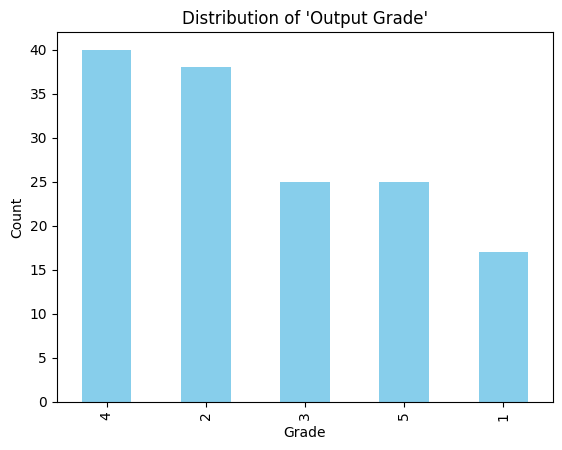

In [ ]:
#Target Variable Distribution - Distribution of students' cumulative grades

import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Count the appearance of each unique value in 'OUTPUT Grade'column
counts = X['Cumulative grade point average in the last semester (/4.00)'].value_counts()
print("Distribution of 'Output Grade':")
print(counts)

# Plot the distribution
counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of 'Output Grade'")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [ ]:
# Preprocessing steps: turning categorical variables into continuous values
# Average cumulative GPA in this dataset
# Map categorical GPA to continuous values using midpoints


gpa_mapping = {
    1: 1.75,
    2: 2.25,
    3: 2.75,
    4: 3.25,
    5: 3.75
}

# Apply mapping
X.loc[:, 'GPA_Continuous'] = X['Cumulative grade point average in the last semester (/4.00)'].map(gpa_mapping)

# Calculate mean and standard deviation
gpa_mean = X['GPA_Continuous'].mean()
gpa_std = X['GPA_Continuous'].std()

print("GPA Statistics in continuous values:")
print(f"Mean: {gpa_mean:.2f}")
print(f"Standard Deviation: {gpa_std:.2f}")

GPA Statistics in continuous values:
Mean: 2.81
Standard Deviation: 0.65


In [ ]:
#Average "expected GPA in the graduation" in this dataset
#Map categorical GPA to continuous values using midpoints

gpa_mapping = {
    1: 0,
    2: 2.5,
    3: 8,
    4: 15.5,
    5: 25
}

# Apply mapping
X.loc[:, 'GPA_Continuous'] = X['Expected Cumulative grade point average in the graduation (/4.00)'].map(gpa_mapping)

# Calculate mean and standard deviation
gpa_mean = X['GPA_Continuous'].mean()
gpa_std = X['GPA_Continuous'].std()

print("GPA Statistics in continuous values:")
print(f"Mean: {gpa_mean:.2f}")
print(f"Standard Deviation: {gpa_std:.2f}")

GPA Statistics in continuous values:
Mean: 7.23
Standard Deviation: 5.12


In [ ]:
#Average scholarship percentage in this dataset
#Map categorical scholarship type to percentages using midpoints

gpa_mapping = {
    1: 0,
    2: 0.25,
    3: 0.5,
    4: 0.75,
    5: 1
}

# Apply mapping
X.loc[:, 'Scholarship_type_continuous'] = X['Scholarship type'].map(gpa_mapping)

# Calculate mean and standard deviation
Scholarship_mean = X['Scholarship_type_continuous'].mean()
Scholarship_std = X['Scholarship_type_continuous'].std()

print("GPA Statistics in continuous values:")
print(f"Mean: {Scholarship_mean:.2f}")
print(f"Standard Deviation: {Scholarship_std:.2f}")

GPA Statistics in continuous values:
Mean: 0.64
Standard Deviation: 0.20


In [ ]:
#Weekly hourly rates in this dataset
#Map Weekly hourly rates using midpoints

gpa_mapping = {
    1: 0,
    2: 2.5,
    3: 8,
    4: 15.5,
    5: 25
}

# Apply mapping
X.loc[:, 'Scholarship_type_continuous'] = X['Scholarship type'].map(gpa_mapping)

# Calculate mean and standard deviation
Scholarship_mean = X['Scholarship_type_continuous'].mean()
Scholarship_std = X['Scholarship_type_continuous'].std()

print("GPA Statistics in continuous values:")
print(f"Mean: {Scholarship_mean:.2f}")
print(f"Standard Deviation: {Scholarship_std:.2f}")

GPA Statistics in continuous values:
Mean: 12.70
Standard Deviation: 6.43


In [ ]:
#Corrleation between each numeric feature to the target variable using Pearson correlation

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset = fetch_ucirepo(id=856)
X = dataset.data.features
y = dataset.data.targets

# Encode target labels - converting categorical labels into numeric codes & turning the numpy array to a 1-dimensional array since LabelEncoder requires 1D input
y_encoded = LabelEncoder().fit_transform(y.values.ravel())

# Pearson correlation for numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
correlation_df = X[numeric_cols].corrwith(pd.Series(y_encoded)).abs().sort_values(ascending=False).to_frame(name='Correlation')

# Show results
print("Pearson Correlation (Numeric Features):\n", correlation_df)

Pearson Correlation (Numeric Features):
                                                     Correlation
Sex                                                    0.335533
Cumulative grade point average in the last seme...     0.315493
Expected Cumulative grade point average in the ...     0.248588
Impact of your projects/activities on your success     0.203273
Reading frequency (non-scientific books/journals)      0.195617
Attendance to the seminars/conferences related ...     0.184763
Additional work                                        0.167445
Total salary if available                              0.166352
Transportation to the university                       0.156289
Discussion improves my interest and success in ...     0.146547
Course ID                                              0.142166
Attendance to classes                                  0.139564
Flip-classroom                                         0.110617
Graduated high-school type                             0.104821